In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('/content/kohli_ipl.csv')


In [3]:
data.head()

,match_no,runs
0,1,1
1,2,23
2,3,13
3,4,12
4,5,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   match_no  215 non-null    int64
 1   runs      215 non-null    int64
dtypes: int64(2)
memory usage: 3.5 KB


# Basic Statistics

In [ ]:
# 1.What is the total number of matches played?
data['match_no'].nunique()


215

In [ ]:
# 2. What is the total number of runs scored?
data['runs'].sum()

6634

In [ ]:
# 3. What is the highest score in a match?
data.max()

,0
match_no,215
runs,113


In [ ]:
# 4. What is the lowest score in a match?
data.min()

,0
match_no,1
runs,0


In [ ]:
# 5. What is the average runs per match?
data['runs'].mean()

30.855813953488372

In [ ]:
# 6. What is the median runs scored per match?
data['runs'].median()

24.0

In [ ]:
# 7. What is the standard deviation of runs scored?
data['runs'].std()

26.22980132830278

In [ ]:
# 8. How many times did Kohli score 50+ runs?
# (data['runs']>=50).sum()
data[data['runs']>=50].shape[0]

50

In [ ]:
# 9. How many times did Kohli score 100+ runs?
data[data['runs']>=100].shape[0]


5

In [ ]:
# 10. How many times did Kohli get out for a duck (0 runs)?
(data['runs']==0).sum()

9

# Distribution Analysis

<Axes: xlabel='runs'>

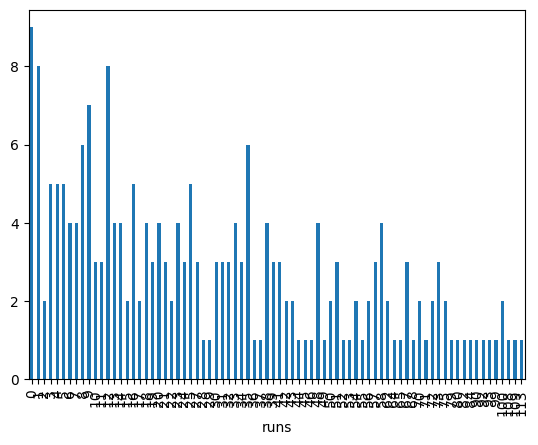

In [12]:
# 1. What is the frequency distribution of runs scored (e.g., histogram)?
# 2. What percentage of matches had scores below 20?
# 3. What percentage of matches had scores between 20 and 50?
# 4. What percentage of matches had scores above 50?
# 5. What is the mode of the runs scored?
# 6. How many matches had scores greater than the mean runs scored?
# 7. What is the interquartile range (IQR) of runs scored?
# 8. What are the outliers in the dataset based on IQR?
# 9. What is the skewness of the runs scored distribution?
# 10.What is the kurtosis of the runs scored distribution?

In [ ]:
# 1. What is the frequency distribution of runs scored (e.g., histogram)?
(data['runs'].value_counts().sort_index()).plot(kind='bar')

In [17]:
# 2. What percentage of matches had scores below 20?
((data[data['runs']<20].shape[0])/(data.shape[0]))*100
# (data["runs"] < 20).mean() * 100

43.25581395348837

In [22]:
# 3. What percentage of matches had scores between 20 and 50?
((data[(data['runs']>20) & (data['runs']<50)].shape[0])/data.shape[0])*100

31.627906976744185

In [26]:
((data['runs']>20) & (data['runs']<50)).mean()*100


31.627906976744185

In [29]:
# 4. What percentage of matches had scores above 50?
(data['runs']>50).mean()*100

22.325581395348838

In [34]:
# 5. What is the mode of the runs scored?
data['runs'].mode().values

array([0])

In [40]:
# 6. How many matches had scores greater than the mean runs scored?
(data['runs']>data["runs"].mean()).count()

215

In [42]:
# 7. What is the interquartile range (IQR) of runs scored?
# interquantile= Q3-Q1
data['runs'].quantile(0.75)-data['runs'].quantile(0.25)

39.0

In [46]:
# 9. What is the skewness of the runs scored distribution?
data['runs'].skew()

0.9773109549290913

In [47]:
# 10.What is the kurtosis of the runs scored distribution?
data['runs'].kurtosis()

0.3559710669788827

# Trend Analysis

In [61]:
# What is the ratio of matches with above-average scores to below-average scores?
ratio = (data["runs"] > data["runs"].mean()).sum() / (data["runs"] < data["runs"].mean()).sum()
ratio

0.7622950819672131

In [ ]:
# What are the best and worst 5-match streaks in terms of total runs?
best_match_streak = data["runs"].rolling(window=5).sum().max()
best_match_streak
worst_match_streak = data["runs"].rolling(window=5).sum().min()
worst_match_streak

In [ ]:

# What is the longest streak of consecutive 50+ scores?
fifty_streaks = (data["runs"] >= 50).astype(int).groupby((data["runs"] < 50).cumsum()).sum()
longest_50_streak = fifty_streaks.max()
longest_50_streak

In [ ]:
# What is the longest streak of consecutive single-digit scores?
longest_streak = max((data["runs"] < 10).astype(int).groupby((data["runs"] >= 10).cumsum()).sum())
longest_streak

# Comparative Analysis

In [ ]:
# What is the difference in average runs between the first and second half of the dataset?
# How many matches had scores within ±10 of the average?
# How many matches had scores below the mean ?
# How many matches had scores above the mean?
# What is the percentage of matches with scores in the top 25%?
# What is the percentage of matches with scores in the bottom 25%?
# How often does Kohli score in multiples of 10 (10, 20, 30, etc.)?
# What is the average score in the first 10 matches of each 50-match block?
# What is the distribution of scores in the first 100 vs. last 100 matches?

In [62]:
# What is the difference in average runs between the first and second half of the dataset?
first_half_avg = data["runs"][: (len(data) // 2)].mean()
second_half_avg = data["runs"][(len(data) // 2):].mean()
diff=first_half_avg-second_half_avg
diff


-7.620110764970576

In [65]:
# How many matches had scores within ±10 of the average?
average_runs= data['runs'].mean()
((data["runs"] >= (average_runs - 10)) & (data["runs"] <= (average_runs + 10))).sum()

53

In [73]:
# How many matches had scores below the mean ?
data[data['runs']<data['runs'].mean()].shape[0]
# How many matches had scores above the mean?
data[data['runs']>data['runs'].mean()].shape[0]


215

In [76]:
# What is the percentage of matches with scores in the top 25%?
(data['runs']>=data['runs'].quantile(0.25)).sum()

167

In [77]:
# What is the percentage of matches with scores in the bottom 25%?
(data['runs']<=data['runs'].quantile(0.25)).sum()


55

In [78]:
# How often does Kohli score in multiples of 10 (10, 20, 30, etc.)?
(data['runs']%10==0).sum()

27

In [81]:
# What is the average score in the first 10 matches of each 50-match block?
[data["runs"][i:i+10].mean() for i in range(0, 200, 50)]

[11.7, 25.7, 40.4, 33.5]

In [83]:
# What is the distribution of scores in the first 100 vs. last 100 matches?
(data["runs"][:100].describe(), data["runs"][-100:].describe())

(count    100.000000
 mean      26.500000
 std       22.231337
 min        0.000000
 25%        9.750000
 50%       21.000000
 75%       38.000000
 max       99.000000
 Name: runs, dtype: float64,
 count    100.000000
 mean      34.920000
 std       29.706538
 min        0.000000
 25%        8.750000
 50%       28.500000
 75%       54.000000
 max      113.000000
 Name: runs, dtype: float64)

# Performance Consistency

In [ ]:
# What is the variance in scores over different sets of 50 matches?
# How frequently does Kohli score exactly the same number of runs in consecutive matches?
# How often does a high score (above 50) follow another high score?
# How often does a low score (below 20) follow another low score?
# What is the highest number of consecutive matches with scores above 50?
# What is the highest number of consecutive matches with scores below 20?
# What is the average runs scored after a match where he scored a duck?

In [85]:
# What is the variance in scores over different sets of 50 matches?
[data["runs"][i:i+50].var() for i in range(0, 200, 50)]

[300.97510204081635, 666.8526530612245, 998.6122448979596, 641.6669387755102]

In [87]:
# How frequently does Kohli score exactly the same number of runs in consecutive matches?
(data['runs'].diff()==0).sum()

5

In [88]:
# How often does a high score (above 50) follow another high score?
((data["runs"].shift(1) >= 50) & (data["runs"] >= 50)).sum()

14

In [89]:
# How often does a low score (below 20) follow another low score?
((data["runs"].shift(1) < 20) & (data["runs"] < 20)).sum()

41

In [91]:
# What is the highest number of consecutive matches with scores above 50?
max((data["runs"] >= 50).astype(int).groupby((data["runs"] < 50).cumsum()).sum())

4

In [92]:
# What is the highest number of consecutive matches with scores below 20?
max((data["runs"] < 20).astype(int).groupby((data["runs"] >= 20).cumsum()).sum())

5

In [93]:
# What is the average runs scored after a match where he scored a duck?

data["runs"].shift(-1)[data["runs"] == 0].mean()

20.444444444444443